# Nearest Neighbors Practice Prob

In this exercise you will use the iris dataset from scikit-learn dataset to perform multiclass classification.  
For simplicity consider using only the first 2 features (_septal length_, _septal width_).

### Things to do:
1. Load the dataset
2. Split the dataset into train/test/validation sets
3. Apply Nearest Neighbors classifier to the dataset
4. Tune the parameter $k$ using validation set to find the best classifier 
5. Report the accuracy of the classifier on train and test data
6. Plot the decision boundary for the best classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets

In [ ]:
# Build a NN classifier.
# Use validation set to tune the classifer for best performance.
# try k = 1, 3, 5, .., 15

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for simplicity
y = iris.target

In [ ]:
## Your code here

# Split into testing and training data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# Split training data into testing and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=10)

In [ ]:
best_k = 1
best_accuracy = 0

for k in [1, 3, 5, 7, 9, 11, 13, 15]: # range(1, 16, 2)
  for p in [1,2,3]:
    clf = KNeighborsClassifier(k, p)
    clf.fit(X_train, y_train)

    predictions = clf.predict(X_valid)
    accuracy = np.sum(predictions == y_valid)/(len(y_valid))
    print ('accuracy = ' + str(accuracy) + ', when k = ' + str(k))
    # Or from sklearn.metrics import accuracy_score, accuracy_score(y_valid, predictions)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_k = k

accuracy = 0.7333333333333333, when k = 1
accuracy = 0.8, when k = 3
accuracy = 0.7666666666666667, when k = 5
accuracy = 0.7666666666666667, when k = 7
accuracy = 0.7666666666666667, when k = 9
accuracy = 0.7666666666666667, when k = 11
accuracy = 0.7333333333333333, when k = 13
accuracy = 0.7666666666666667, when k = 15


In [ ]:
print(best_k)

clf = KNeighborsClassifier(best_k)
clf.fit(X_train_full, y_train_full)
predictions = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(predictions == y_test)/(len(y_test))) + ', when best k = ' + str(best_k))

3
Test accuracy = 0.8666666666666667, when best k = 3


Visualizing the decision boundary

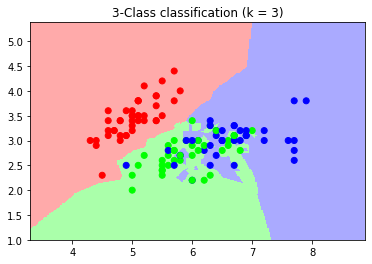

In [ ]:
## helper code to visualize the decision boundary

## set the following values accordingly for visualiziation
classifier = clf  # classifier object
n_neighbors = best_k   # value of k
X = X_train_full         # Data to plot (training data)
y = y_train_full

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors))

plt.show()